### Ordinal Number Encoding
- grading system A-1,B-2
- Experience of batsman A-10-1,B-5-2
- Weekdays and weekend(Mon,tue,wed)

In [3]:
import datetime

In [4]:
today_date = datetime.datetime.today()

In [5]:
today_date

datetime.datetime(2020, 11, 20, 16, 48, 54, 865626)

In [10]:
today_date-datetime.timedelta(1)

datetime.datetime(2020, 11, 19, 16, 48, 54, 865626)

In [11]:
### List comprehension

In [72]:
days = [today_date-datetime.timedelta(i) for i in range(0,15)]


In [14]:
import pandas as pd

In [73]:
data = pd.DataFrame(days)
data.columns=["Day"]

In [74]:
data.head()

,Day
0,2020-11-20 16:48:54.865626
1,2020-11-19 16:48:54.865626
2,2020-11-18 16:48:54.865626
3,2020-11-17 16:48:54.865626
4,2020-11-16 16:48:54.865626


In [76]:
data['weekday']=data['Day'].dt.day_name()

In [77]:
data

,Day,weekday
0,2020-11-20 16:48:54.865626,Friday
1,2020-11-19 16:48:54.865626,Thursday
2,2020-11-18 16:48:54.865626,Wednesday
3,2020-11-17 16:48:54.865626,Tuesday
4,2020-11-16 16:48:54.865626,Monday
5,2020-11-15 16:48:54.865626,Sunday
6,2020-11-14 16:48:54.865626,Saturday
7,2020-11-13 16:48:54.865626,Friday
8,2020-11-12 16:48:54.865626,Thursday
9,2020-11-11 16:48:54.865626,Wednesday


In [78]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [79]:
dictionary


{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [80]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [81]:
data.head()

,Day,weekday,weekday_ordinal
0,2020-11-20 16:48:54.865626,Friday,5
1,2020-11-19 16:48:54.865626,Thursday,4
2,2020-11-18 16:48:54.865626,Wednesday,3
3,2020-11-17 16:48:54.865626,Tuesday,2
4,2020-11-16 16:48:54.865626,Monday,1


#### Count Or Frequency Encoding

In [83]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [84]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


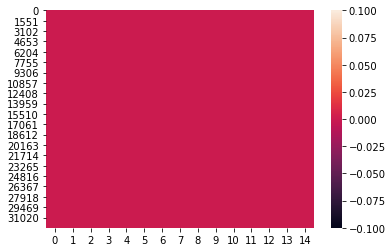

In [49]:
import seaborn as sns
sns.heatmap(train_set.isnull())

In [85]:
train_set[1].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [51]:
len(train_set[1].unique())

9

In [53]:
for i in [1,3,5,6,7,8,9,13]:
    print(len(train_set[i].unique()))

9
16
7
15
6
5
2
42


In [87]:
columns=[1,3,5,6,7,8,9,13]
train_set=train_set[columns]

In [88]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [89]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [90]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [91]:
country_map = train_set['Country'].value_counts().to_dict()

In [92]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

<ipython-input-92-15f7d40037bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


##### Advantages
1. Easy To Use
2. Not increasing feature space
##### Disadvantages
1. It will provide same weight if the frequencies are same

#### Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [94]:
df=pd.read_csv(r'E:\jupyter\Feature Engineering\Feature-Engineering-Live-sessions\titanic.csv',usecols=['Cabin','Survived'])

In [95]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [97]:
df.isnull().sum()

Survived      0
Cabin       687
dtype: int64

In [98]:
df['Cabin'].fillna('Missing',inplace=True)

In [99]:
df.isnull().sum()

Survived    0
Cabin       0
dtype: int64

In [105]:
df['Cabin'].astype(str).str[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [106]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [107]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [108]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [109]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [110]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [112]:
enumerate(ordinal_labels,0)
# here 0 means starting index

In [111]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [113]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


#### Mean Encoding

In [114]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [115]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [116]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854
